# Airlines Delay and Cancellation Analysis

### By Parshant Sharma

## Investigation Overview

> ### In 2008 more than 10 million flights were made in the United States, not all of these flights depart on time, what happens to these flights? Are they diverted or canceled? What are the causes main cancellation of these flights?

> According to a report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.

## Dataset Overview

> We have information on 1,936,757 flights that present delays and 30 variables that describe the delay time in departure, arrival or during the flight, the causes of the flight and the day of the year when the delay occurred. We'll start by reading in and lightly cleaning the data. Then we'll do some data exploration that gives us a clearer idea of what is in this dataset. Once we feel more comfortable with the datase.

In [36]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [37]:
# Reading and showing head data
flights = pd.read_csv("DelayedFlights.csv")
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,nan,nan,nan,nan,nan


In [38]:

# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['ArrDelay'] <= 15, 'Status'] = 0
    flights.loc[flights['ArrDelay'] >= 15, 'Status'] = 1
    flights.loc[flights['ArrDelay'] >= 60, 'Status'] = 2
    flights.loc[flights['Diverted'] == 1, 'Status'] = 3
    flights.loc[flights['Cancelled'] == 1, 'Status'] = 4
    
    
#Cancellation cause
flights.loc[flights["CancellationCode"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CancellationCode"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CancellationCode"] =="C", 'CancellationCode'] = "2"

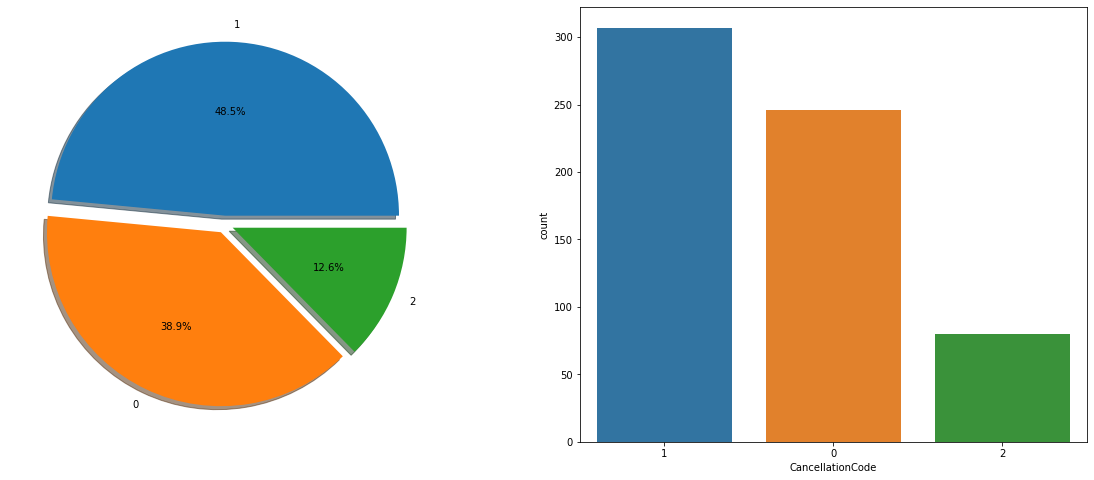

0 = carrier, 1 = weather, 2 = NAS


In [43]:
CancFlights = flights[(flights.Status == 4)]
colors = ['#ffff99','#6693ff','#99ff99','#fccc99']
f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = CancFlights['CancellationCode'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('0 = carrier, 1 = weather, 2 = NAS')

## Status of flights

> ### In 2008, a whooping 64,4% of domestic flights in the US were delayed by more than 15 minutes. 35,8% of them (or 23,1% of total fligths) had delays of more than one hour! Another different interpretation is that 76,5% of flights have delay of one hour or less. 

> ### On the other hand, just a 0,03% of flights were cancelled and 0,4% were diverted. 

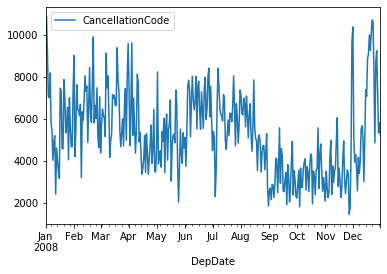

In [40]:
flights[['DepDate','CancellationCode']].groupby(['DepDate']).count().plot()
plt.show()

## Cancelled flights

> ### During 2008, there were only cancellations in the last three months of the year (from October to December). Doing a bit of research we find that 2008 winter was unusual, especially in December, with coast-to-coast severe winter weather, including one low pressure system from December 9-12 that brought snow to Houston and New Orleans, severe storms and flooding to other parts of the South, and an ice storm that left more than 1.27 million homes and business without power in the Northeast. 
> ### The bad weather might actually be the reason behind all the cancellations, since for rest of the year there are no registered cancellations at all. The compounded effect of the flights cancelled affect other programmed flights down the lane. 

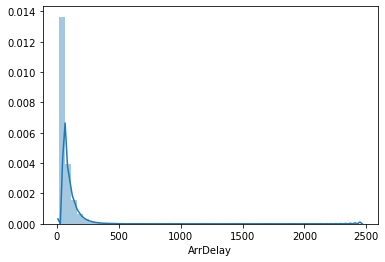

In [41]:
#histogram
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]
sns.distplot(Delayedflights['ArrDelay'])
plt.show()

## Delayed flights

> ### It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time. 

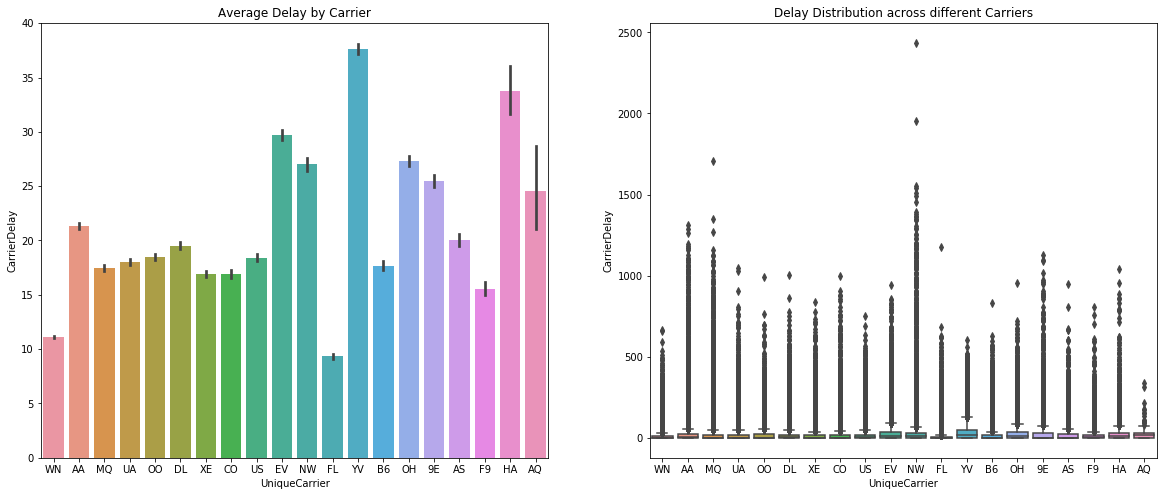

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution across different Carriers')
plt.close(2)
plt.show()

## Carrier Delays 

> ### 4 from the top 5 companies in the domestic market (Southwest Airlines (WN), American Eagle Airlines (MQ), United Airlines (UA) and Skywest Airlines (OO) create an average delay below the mean (19 minutes). Southwest Airlines, with an outstanding 11.7 minutes per flight, the second lowest of all the carriers. 

> ### Carriers with higher average delay generation are Mesa Airlines (YV) with 37.63 minutes per flight, Hawaian Airlines (HA) with 33.76 minutes per flight and ExpressJet (EV) with 29,70. As we go from left to right in the barplot, it can be seen how airlines with lower volumen of flights tend to have a higher Carrier Delay (with the exception of AirTrans, integrated into Southwest in 2014); so it seems like size matters.

> ### On the other hand, taking responsibility of a higher number of flights results in a higher chance of having an extreme waiting situation. Northwest, American Eagle and American Airlines registered the maximum Carrier Delay for 2008.

# Summary of Findings

## Exploration Summary

> -   I had some assumptions going into my exploration of the flights data and I was quite surprised on a number of them. After comparing the 1988 and 2008 datasets at the initial part of my exploration, I decided for dig deeper into the 2008 dataset, as they were both very similar. Probably the biggest thing that surprised me, despite how often you hear about delays at the airport, is that flights in 2008 on average are departing and arriving a few minutes early.

> -   Another aspect of the analysis that surprised me was how on July 4, Thanksgiving and Christmas there is lowest levels of flight delay time, due to the low demand for them, but the following or previous days present the highest levels of delay. of flights due to the increase in operations generated by people trying to fly home

> -   The airline with the most delays are Southwest Airlines, followed by American Airlines. The three airports with the most flight delays are Atlanta (ATL), Chicago (ORD) and Dallas (DFW) of 303 airports in the dataset.

> -   Out of 1929004 flights that are delayed, only 7754 (<1%) are canceled, Of those 633 canceled flights, 307 were due to time, 246 by carrier and 80 by security.

> -   In summary, despite huge technological advances in the world, many things about air travel have remained the same. I'd be interested to dig into a 2019 flight dataset; however, 2008 was the last one available on the RITA website. Safety is the main concern for air travel; if we're able to average arriving a few minutes early, I'd consider that a huge success.
